In [ ]:
# gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# cluster
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans


In [ ]:
# carregar dados
dados = pd.read_csv('/content/Fiap On - Fase 6 - Geolocalização Dataset - Asset.csv')

In [ ]:
dados.head()

,latitude,longitude,price
0,"-21,591360","-51,066690","52,47"
1,"-21,285350","-49,654970","37,03"
2,"-22,025900","-47,067020","71,50"
3,"-21,916230","-46,686660","88,27"
4,"-22,476390","-46,632780","36,16"


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   latitude   653 non-null    object
 1   longitude  653 non-null    object
 2   price      653 non-null    object
dtypes: object(3)
memory usage: 15.4+ KB


In [ ]:
# transformar os dados de string para float
dados['latitude'] = dados['latitude'].str.replace(',', '.').astype(float)
dados['longitude'] = dados['longitude'].str.replace(',', '.').astype(float)
dados['price'] = dados['price'].str.replace(',', '.').astype(float)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   653 non-null    float64
 1   longitude  653 non-null    float64
 2   price      653 non-null    float64
dtypes: float64(3)
memory usage: 15.4 KB


In [ ]:
# selecionar colunas
cols=['latitude','longitude']
dados_cluster=dados[cols]

# min-max
minmax_scaler=MinMaxScaler()
dados_minmax=minmax_scaler.fit_transform(dados_cluster)
dados_minmax.shape

# normalizar
dados_normalizados=scale(dados_cluster)
dados_normalizados.shape

(653, 2)

In [ ]:
# treinamento
cluster_kmeans=KMeans(n_clusters=5, max_iter=1000)
cluster_kmeans.fit(dados_normalizados)
# associar os clusters aos dados
dados['cluster']=cluster_kmeans.predict(dados_normalizados)
dados.head()

,latitude,longitude,price,cluster
0,-21.59136,-51.06669,52.47,2
1,-21.28535,-49.65497,37.03,0
2,-22.02590,-47.06702,71.50,4
3,-21.91623,-46.68666,88.27,4
4,-22.47639,-46.63278,36.16,3


In [ ]:
# contagem
dados.groupby('cluster').size().to_frame('n')

,n
cluster,
0,113
1,107
2,129
3,166
4,138


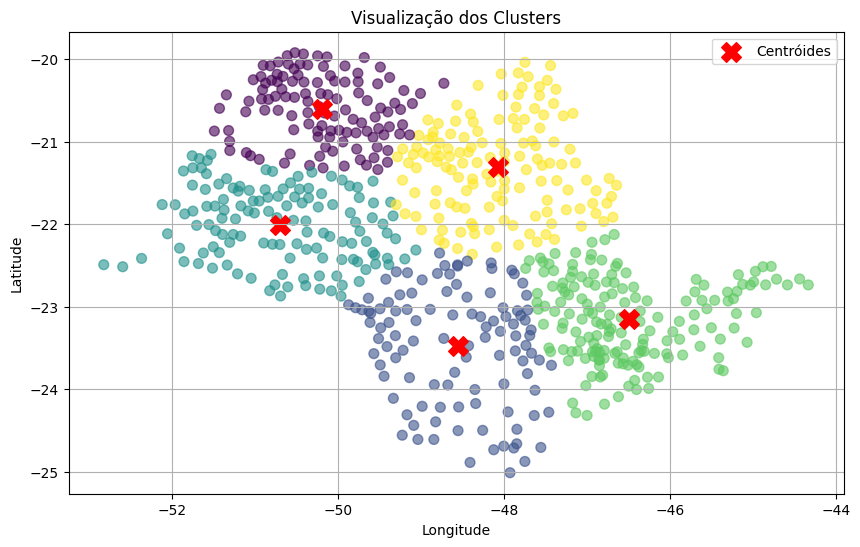

In [ ]:
# Visualização dos clusters

# Calcular os centróides (média das coordenadas por cluster)
centroides = dados.groupby('cluster')[['longitude', 'latitude']].mean().reset_index()

# Visualizar os clusters
plt.figure(figsize=(10, 6))

# Plotar os pontos dos clusters
plt.scatter(dados['longitude'], dados['latitude'],
            c=dados['cluster'], cmap='viridis',
            marker='o', s=50, alpha=0.6)

# Plotar os centróides
plt.scatter(centroides['longitude'], centroides['latitude'],
            c='red', marker='X', s=200, label='Centróides')

plt.title('Visualização dos Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Analisar as características de cada cluster
cluster_caracteristicas = dados.groupby('cluster').agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'price': 'sum'
})
display(cluster_caracteristicas)


,latitude,longitude,price
cluster,,,
0,-20.601651,-50.187150,7328.15
1,-23.479226,-48.556415,6853.44
2,-22.014611,-50.699276,7595.52
3,-23.155088,-46.493912,10535.92
4,-21.310022,-48.075664,8870.78
